# Interactions


We have already defined classical molecular dynamics as follows:

```{admonition} Definition of Molecular Dynamics (MD)

Molecular Dynamics is the evolution of Newton’s equations motion in time. 
In short, the problem is simply to solve numerically `F=ma`.

```

Using Newtonian mechanics means that we do not consider any quantum mechanical phenomena. The practical consequences include that classical MD doesn't have electrons and cannot describe chemical reactions. 

## Basic concepts: the Hamiltonian


Typically, the system is described by a model Hamiltonian that depends on the degrees of freedom the system has. The Hamiltonian expresses the total energy of an isolated system as a function of coordinates and momenta. In the following, we denote the coordinates by $\vec{q}$ and the momenta by $\vec{p}$. The Hamiltonian, $\mathcal{H} \equiv \mathcal{H}(\vec{q}, \vec{p})$,
is defined as the sum of the kinetic ($T$) as

\begin{equation}
\mathcal{H} = T + V.
\end{equation}

It is worth remembering that in the Lagrangian formulation of classical mechanics, the energy function (the Lagrangian) is defined as the difference between the kinetic and potential energies, that is, $\cal{L} = T-V$. The Hamiltonian and the Lagrangian are related to each other via a Legendre transform.

### Conservation of energy

It is important to notice that Hamilton's equations of motion conserve the total energy of the system. Conservation of energy can be simply expressed as

\begin{equation}
\frac{d \mathcal{H}}{dt} = 0,
\end{equation}

in other words, $\mathcal{H}(\vec{q}, \vec{p}) = \mathrm{constant}$.

This has also some very pragmatic consequences: The conservation of energy means that any MD simulation (without the addition of thermostats and such), must obey this. That is, the energy of the system must remain constant throughout the simulation. This is a strict requirement and can/should be used to check that the simulation is performing correctly. If energy is either decreasing or increasing, there is something (seriously) wrong with the simulation. 

Let's discuss this a bit further. We know from classical mechanics that conservative forces do not depend on time, only the position. Conservative forces have to fulfill any of the following equivalent conditions, 

1. $ \nabla \times \vec{F} = 0$.
1. $W = \oint_C \vec{F} \cdot \vec{r}= 0$, where $W$ is work.
1. $\vec{F} = - \nabla U$, where $U$ is the potential.
   

%Conservative forces can be derived from potentia

%## Newton's laws of motion


%## Bonded interactions

%## Non-bonded interactions





# The Lennard-Jones potential

The Lennard-Jones (LJ) potential is the most common way of describing non-bonded (non-electrostatic) particle-particle interactions. The LJ potential can be written as

\begin{equation}
U_\mathrm{LJ} = 4 \epsilon \left[
\left(
\frac{\sigma}{r}
\right)^{12}
-\left(
\frac{\sigma}{r}
\right)^6
\right],
\end{equation}

where $\epsilon$ is the value of the potential at its minimum and $\sigma$ is related to the atomic diameter (we'll elaborate on that later). The LJ potential and some of its main features are plotted below.

It is important to notice that although the LJ potential is classical, it has a quantum mechanical origin. 
The repulsive $r^{-12}$ term cannot be derived from first principles and, in principle, any rapidly diverging term for $r \rightarrow 0$ is possible. The above form is the most commonly used one. Although the term cannot be derived analytically, it has its origin in the [Pauli exclusion principle](https://en.wikipedia.org/wiki/Pauli_exclusion_principle), i.e., it has a quantum mechanical origin.

The attractive $r^{-6}$ term can be analytically derived using the Lifshitz theory (beyond this course). Physically, it arises from the spontaneous fluctuations of the electric dipole moment caused by the motions of the electrons: An atom causes a fluctuation in the electron clouds of the neighboring atoms and vice versa giving rise to dipole and multipole moments. This is why it is sometimes called the dispersion interaction. It is also important to notice that the van der Waals $r^{-6}$ term is *always attractive*.

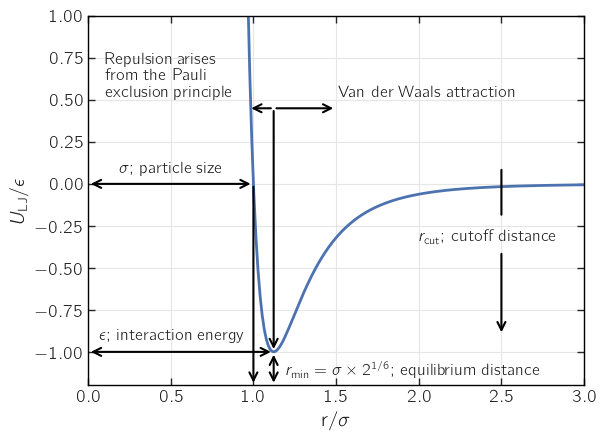

In [1]:
#=============================================================
# 
# Import basic tools

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#=============================================================
#
# Import Seaborn to make a pretty plot.
#
# Seaborn is excellent for controlling decorations, line widths
# color palettes, etc.
#
#   - Define background for the plot
#   - Define if a grid is used (background)
#   - Define font families
#   - Define line widths
#
# Ideally, this should be put in a separate file and imported, 
# but is included here as an example.
#=============================================================

import seaborn as sns
from matplotlib import rc


sns.set()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.0})

#---- This allows the use of LaTeX + the use sans-serif fonts also for tick labels:

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')

# There are 5 presents for background: darkgrid, whitegrid, dark, white, and ticks
# Define how ticks are placed and define font families

sns.set_style("ticks")
sns.set_style("whitegrid", 
 {'axes.edgecolor': 'black',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'grid.color': '0.9',
 'grid.linestyle': '-',
 'xtick.direction': 'in', 
 'ytick.direction': 'in',
 'xtick.bottom': True,
 'xtick.top': True,
 'ytick.left': True,
 'ytick.right': True, 
 'font.family': ['sans-serif'],
 'font.sans-serif': [
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],})


#===================================================================
#
# Plot LJ in dimensionless units

r_start = 0.5
r_end   = 3.0

r       = np.linspace(r_start, r_end, num=200) 
epsilon = 1.0 
sigma   = 1.0 
U_LJ    = 4.0*epsilon*((sigma/r)**12-(sigma/r)**6) 
r_min   = sigma*2**(1.0/6.0)
r_cut   = 2.5

x_xmax = r_end
x_xmin = 0.0 
y_ymax = 1.0
y_ymin = -1.2

plt.xlim([0.0,r_end])
plt.ylim([y_ymin,y_ymax])
plt.xlabel(r"r/$\sigma$")
plt.ylabel(r"$U_\mathrm{LJ}/\epsilon$")
plt.plot(r, U_LJ, linestyle='-')

#plt.axvline(x=sigma*2**(1.0/6.0), color='black', linestyle='--')
#plt.axhline(y=-epsilon, color='black', linestyle='--')

#-- sigma 

plt.annotate("", 
             xy=(0,0), 
             xytext=(sigma,0.0), 
             arrowprops=dict(arrowstyle="<->",
                             connectionstyle="arc3",
                             color="black",
                             lw=1.5),
             )

plt.annotate(r"$\sigma$; particle size", xy=(0.5, 0.05), 
             size=12, ha='center', va="bottom")

plt.annotate("", 
             xy=(sigma,0), 
             xytext=(sigma,y_ymin), 
             arrowprops=dict(arrowstyle="<-",
                             connectionstyle="arc3",
                             color="black",
                             lw=1.5,
                             ls ="-"),
             )

#-- epsilon

plt.annotate("", 
             xy=(0,-epsilon), 
             xytext=(r_min,-epsilon), 
             arrowprops=dict(arrowstyle="<->",
                             connectionstyle="arc3",
                             color="black",
                             lw=1.5),
             )

plt.annotate(r"$\epsilon$; interaction energy", xy=(0.5, -0.95), 
             size=12, ha='center', va="bottom")

plt.annotate("", 
             xy=(r_min,-epsilon), 
             xytext=(r_min,y_ymin), 
             arrowprops=dict(arrowstyle="<->",
                             connectionstyle="arc3",
                             color="black",
                             lw=1.5),
             )

plt.annotate(r"$r_\mathrm{min} = \sigma \times 2^{1/6}$; equilibrium distance", xy=(1.2, -1.15), 
             size=12, ha='left', va="bottom")

plt.annotate("Repulsion arises\n from the Pauli\n exclusion principle", xy=(0.1, 0.5), 
             size=12, ha='left', va="bottom")

plt.annotate("Van der Waals attraction", xy=(1.51, 0.5), 
             size=12, ha='left', va="bottom")

#plt.arrow(x=0, y=0, dx=1, dy=0, width=.08) 

plt.annotate("", 
             xy=(r_cut,0.1), 
             xytext=(r_cut,-0.2), 
             arrowprops=dict(arrowstyle="-",
                             connectionstyle="arc3",
                             color="black",
                             lw=1.5),
             )

plt.annotate(r"$r_\mathrm{cut}$; cutoff distance", xy=(2.0, -0.32), 
             size=12, ha='left', va="center")

plt.annotate("", 
             xy=(r_cut,-0.4), 
             xytext=(r_cut,-0.9), 
             arrowprops=dict(arrowstyle="<-",
                             connectionstyle="arc3",
                             color="black",
                             lw=1.5),
             )

plt.annotate("", 
             xy=(r_min,0.45), 
             xytext=(r_min,-1.0), 
             arrowprops=dict(arrowstyle="<-",
                             connectionstyle="arc3",
                             color="black",
                             lw=1.5),
             )

plt.annotate("", 
             xy=(r_min,0.45), 
             xytext=(1.5,0.45), 
             arrowprops=dict(arrowstyle="<-",
                             connectionstyle="arc3",
                             color="black",
                             lw=1.5),
             )

plt.annotate("", 
             xy=(r_min,0.45), 
             xytext=(0.97,0.45), 
             arrowprops=dict(arrowstyle="<-",
                             connectionstyle="arc3",
                             color="black",
                             lw=1.5),
             )

a=1
# The cutoff and shifting value

#phicutoff = 4.0/(Rcutoff**12)-4.0/(Rcutoff**6) # Shifts the potential so at the cutoff the potential goes to zero

#U_LJ_shift = U_LJ - phicutoff # Subtract the value of the potential at r=2.5

#plt.plot(r[:415],E_LJ_shift[:415],'b-',linewidth=1,label=r"$LJ\; pot\; shifted$") # Blue line is shifted

The van der Waals force ($r^{-6}$ term) has three contributions:

1. Keesom force: Interactions between permanent charges and multipoles
2. Debye force, also called polarization: Forces between a permanent multipole and an induced multipole.
3. London forces, also called London dispersion interactions: These are *instantaneous* dipole–induced dipole forces.
   
Averaging over random orientations yields a $r^{-6}$ term for each of the above.

Let's now return to the $\sigma$ parameter. As the figure shows, $\sigma$ gives the distance at which the interaction between two particles is zero. If the particles are identical, $\sigma$ is then the diameter of the particle. The situation is more complex when the particles are not identical, and we will return to this  matter later. 



The LJ potential is used in essentially all classical level molecular modeling, and it is a surprisingly good fit (albeit with caveats) when only two-body interactions are important. It is important to notice that the LJ potential is short-ranged. 

The Lennard-Jones potential is named after Sir John Lennard-Jones.

````{dropdown} **Sir John Lennard-Jones**

```{image} ../../img/img-wiki/Lennard_Jones.jpg
:alt: Lennard-Jones
:width: 150px
:align: right
```



[Sir John Lennard-Jones](https://en.wikipedia.org/wiki/John_Lennard-Jones) was the PhD supervisor of [Sir John Pople](https://en.wikipedia.org/wiki/John_Pople) who shared [1998 Nobel Prize in Chemistry](https://www.nobelprize.org/prizes/chemistry/1998/summary/)  with [Walter Kohn](https://en.wikipedia.org/wiki/Walter_Kohn). Lennard-Jones' PhD supervisor was [Sir Ralph Fowler](https://en.wikipedia.org/wiki/Ralph_H._Fowler) - three of his PhD students became Physics Nobel Laureates, namely [Paul Dirac](https://en.wikipedia.org/wiki/Paul_Dirac), [Subrahmanyan Chandrasekhar](https://en.wikipedia.org/wiki/Subrahmanyan_Chandrasekhar) and [Sir Neville Mott](https://en.wikipedia.org/wiki/Nevill_Francis_Mott).

The [Lennard-Jones potential](https://en.wikipedia.org/wiki/Lennard-Jones_potential) used in almost all classical molecular dynamics simulations is named after him and he was the first person in the world to hold a Chair of Theoretical Chemistry(U. Cambridge 1932){cite}`Mott1955`.

**Picture credit:** Copyright Computer Laboratory, University of Cambridge. Reproduced by permission. Creative Commons License.




````

### Cutoff

To be useful in simulations, we have to introduce a cutoff, $r_\mathrm{cut}$, for the LJ potential. This cutoff leads to discontinuity in the potential and sometimes the potential is shifted to be zero at $r_\mathrm{cut}$.




### Dimensionless units

It is very common to express (and use) the LJ potential using reduced, or dimensionless, units. This can be done by noticing that the LJ potential,

\begin{equation}
U_\mathrm{LJ} = 4 \epsilon \left[
\left(
\frac{\sigma}{r}
\right)^{12}
-\left(
\frac{\sigma}{r}
\right)^6
\right],
\end{equation}

has only two parameters, $\sigma$ and $\epsilon$. In addition, particle mass ($m$) is a free parameter.

```{admonition} LJ parameters
:class: tip

1. $\sigma$: unit of length
1. $\epsilon$: unit of energy
1. $m$: unit of mass.
```

Using these, we can define the dimensionless length and potential as

$$
r^* \equiv \frac{r}{\sigma}
$$

and

$$
u^* \equiv \frac{U_\mathrm{LJ}}{\epsilon}
$$

Why would this be a good idea? There are several reasons. A practical reason is that instead of using atomic dimensions, with reduced units all the dimensions are of the order of unity making the simulations numerically more stable. There is also a deeper reason: Using the reduced units transforms the LJ potential to the form 

$$
U_\mathrm{LJ} = \epsilon u^*(\sigma/r).
$$

This means that all the systems that can be described by the above formula follow the same *equation of state*. Thus, the Law of Corresponding States applies. From the practical point of view, we can then simulate all such systems setting $\sigma = 1$, $\epsilon =1$ and $m=1$. 

Using the above reduced units, we can give the dependent quantities in terms of the new variables. For example,

- temperature: $\frac{k_BT}{\epsilon}$
- density: $\rho \sigma^3$
- pressure: $\frac{p \sigma^3}{\epsilon}$
- force: $\frac{F \sigma}{\epsilon}$
- time: $t\,\sqrt{\frac{\epsilon}{m \sigma^2}}$
- surface tension: $\frac{\gamma \sigma^2}{\epsilon}$
- velocity: $v \sqrt{\frac{m}{\epsilon}}$

In addition, it is common to set $k_\mathrm{B} = 1$ which further simplifies the above.


%## The truncated and shifted Lennard-Jones  potential

%In polymer modelling, it is often necessary to modify the Lennard-Jones potential in such a 
 away that both good and bad solvent conditions can be be modelled. Good solvent conditions 
 can be modelled by the purely repulsive so-called truncated and shifted Lennard-Jones potential,


%
%\begin{equation}
%\label{eq:lennardjones}
%U_{\rm LJ} (r_{ij}) = \left\{
%\begin{array}{ll}
%4\,\epsilon \left[ \left(\frac{\sigma}{r_{ij}}\right)^{12} 
%- \left(\frac{\sigma}{r_{ij}}\right)^{6} 
%  + \frac{1}{4} \right] 
% & ,\, r_{ij} \leq r_c \\
%0  & ,\, r_{ij} > r_c
%\end{array}
%\right .
%\end{equation}
%
%such that the potential is purely repulsive and decays 
%smoothly to zero at $r_c$. We choose $\sigma = 2^{-1/6}$ and 
%$\epsilon = k_B T^{\ast}$, and therefore $ r_c = \sigma \, 2^{1/6} = 1$.
%The pairwise conservative force acting on a monomer due to 
%other monomers in a chain therefore follows directly from
%$\vec{F}^C = - \nabla ( U_{\rm harm} + U_{\rm LJ} ) $


## The Lennard-Jones force

Using the Hamiltonian formulation of mechanics, the equations of motion are written as a set of first-order differential equations

\begin{equation}
\vec{F}(r_{ij}) = - \nabla U(r_{ij}).
\end{equation}

Let's see this through a practical example. With the help of the chain rule, the force that atom 2 exerts on atom 1 can be written as 

\begin{align*} 
\vec{F}_{21} & = - \nabla_{\vec{r}_1} U_\mathrm{LJ}(r_{12}) \\
&  = - \left [ \frac{\partial U_\mathrm{LJ}(r_{12})}{ \partial x_1} \hat{i}
             + \frac{\partial U_\mathrm{LJ}(r_{12})}{ \partial y_1} \hat{j}
             + \frac{\partial U_\mathrm{LJ}(r_{12})}{ \partial z_1} \hat{k}
              \right] \\
& = - \frac{dU_\mathrm{LJ}(r_{12})}{dr_{12}} 
    \left[ \frac{\partial r_{12}}{\partial x_1} \hat{i}
         + \frac{\partial r_{12}}{\partial y_1} \hat{j}
         + \frac{\partial r_{12}}{\partial z_1} \hat{k}
          \right]
\end{align*}

This can be simplified by remembering that $r_{12} = |\vec{r}_{12}| = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2 + (z_2-z_1)^2 }$ and that

\begin{align*} 
\vec{r}_{12} & = (x_2-x_1) \hat{i} + (y_2-y_1) \hat{j} + (z_2-z_1) \hat{k} \\
&= x_{12} \,\hat{i} + y_{12} \, \hat{j} + z_{12} \,\hat{k}   
\end{align*}

Using these yields

\begin{equation}
\vec{F}(r_{21}) = -\frac{dU_\mathrm{LJ}(r_{12})}{dr_{12}}  \frac{1}{|\vec{r}_{12}|}
\left[ x_{12}\,\hat{i} +  y_{12}\,\hat{j} +  z_{12}\,\hat{k} \right].
\end{equation}

To perform the calculations, let's use $U_\mathrm{LJ}$. Then, we obtain

\begin{equation}
\vec{r}_{12} = - \frac{48}{\sigma^{12}} 
  \left[ 
  \left(
    \frac{\sigma}{r_{12}} 
    \right)^{14} 
  - \frac{1}{2} 
   \left( \frac{\sigma}{r_{12}} \right)^8 \right] 
   \times \left[ x_{12} \hat{i} + y_{12}\hat{j} + z_{12}\hat{k} 
  \right]
\end{equation}

Why this form? Because this involves no square roots! Square roots are costly to compute and here we have only even powers that we can take easily. The figure below shows some differences between the force and the potential.

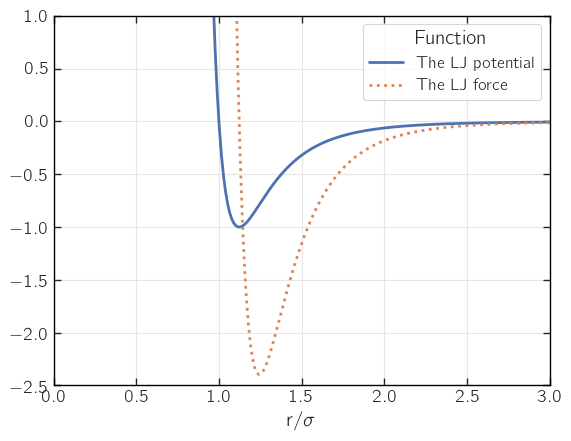

In [2]:
force = 48*epsilon/sigma*((sigma/r)**(13)-1/2*(sigma/r)**7)
plt.xlim([0.0,r_end])
plt.ylim([-2.5,y_ymax])
plt.xlabel(r"r/$\sigma$")
plt.plot(r, U_LJ, linestyle='-',label="The LJ potential")
plt.plot(r, force, linestyle=':', label="The LJ force")
plt.legend(title="Function",loc='upper right',fontsize='small',fancybox=True)
a= 1

%## Morse potential

%## Buckingham potential

%The Buckingham potential is another potential that includes van der Waals $\sim -r^{-6}$ interactions. 
%In contrast the Lennard-Jones $6-12$ form, the repulsive part is modelled by an exponential term.
%The Buckingham potential can be written as
%
% \begin{equation}
%\label{ }
%U(r_{ij}) = \varepsilon
%\left[
%\frac{6}{\alpha-6} 
%\exp \left(
%- \alpha 
%\left(
%\frac{r_{ij}}{r_m} -1
%\right)
%\right)
%- \frac{\alpha}{\alpha -6}
%\left(
%\frac{r_m}{r_{ij}}
%\right)^6
%\right]
%\end{equation}
%  models the repulsion part more realistically than the Lennard-Jones potential. $\varepsilon$, $\alpha$ and $r_m$
%are parameters, that need to be determined from experiments or \textit{ab initio} 
%  calculations. The above functional form needs a short-range cutoff since  as $r_{ij} \rightarrow 0$,  $U \rightarrow - \infty$. 
%  This potential is not often used in simple force fields, since the exponential is expensive 
%  to evaluate and it has more parameters more than the Lennard-Jones potential. 
%  but it is more often used to describe the interactions in solids or metallic systems.
%



## Bibliography


```{bibliography} ../../references.bib
    :filter: docname in docnames
    :style: plain
```